In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.cluster import MeanShift, KMeans, AffinityPropagation, AgglomerativeClustering, FeatureAgglomeration, SpectralClustering, estimate_bandwidth
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score, v_measure_score
#from sklearn import cluster

In [9]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from bs4 import BeautifulSoup
import requests



cid ='b2e6b7236b5049a18bfde863c279fae9'
secret ='13ca6fa8018d4c8eb03ff8510fc96d2c'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [10]:
#insert the URI as a string into the function
def get_album_tracks(uri_info):
    uri = []
    track = []
    duration = []
    explicit = []
    track_number = []
    one = sp.album_tracks(uri_info, limit=50, offset=0, market='ID')
    df1 = pd.DataFrame(one)
    
    for i, x in df1['items'].items():
        uri.append(x['uri'])
        track.append(x['name'])
        duration.append(x['duration_ms'])
        explicit.append(x['explicit'])
        track_number.append(x['track_number'])
    
    df2 = pd.DataFrame({
    'uri':uri,
    'track':track,
    'duration_ms':duration,
    'explicit':explicit,
    'track_number':track_number})
    
    return df2

In [11]:
#insert output dataframe from the get_album_tracks function
def get_track_info(df):
    danceability = []
    energy = []
    key = []
    loudness = []
    speechiness = []
    acousticness = []
    instrumentalness = []
    liveness = []
    valence = []
    tempo = []
    for i in df['uri']:
        for x in sp.audio_features(tracks=[i]):
            danceability.append(x['danceability'])
            energy.append(x['energy'])
            key.append(x['key'])
            loudness.append(x['loudness'])
            speechiness.append(x['speechiness'])
            acousticness.append(x['acousticness'])
            instrumentalness.append(x['instrumentalness'])
            liveness.append(x['liveness'])
            valence.append(x['valence'])
            tempo.append(x['tempo'])
            
    df2 = pd.DataFrame({
    'danceability':danceability,
    'energy':energy,
    'key':key,
    'loudness':loudness,
    'speechiness':speechiness,
    'acousticness':acousticness,
    'instrumentalness':instrumentalness,
    'liveness':liveness,
    'valence':valence,
    'tempo':tempo})
    
    return df2

In [12]:
#getting popularity of songs
def popularity(df):
    empty = []
    for i in df['uri']:
            series_track = pd.Series(sp.track(i))
            empty.append(series_track)
    df2 = pd.DataFrame(empty)
    return df2

In [13]:
metadata1 = get_album_tracks('https://open.spotify.com/album/6kZ42qRrzov54LcAk4onW9?si=hTmFR29uR4ayEcRqNYqSLg')
metadata2 = get_track_info(metadata1)
taylorswift1 = popularity(metadata1)
taylorswift1 = taylorswift1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
taylorswift = metadata1.join([metadata2, taylorswift1])

In [46]:
taylorswift

,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,...,disc_number,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,type
0,spotify:track:6lzc0Al0zfZOIFsFvBS1ki,State Of Grace (Taylor's Version),295413,False,1,0.594,0.713,9,-5.314,0.0503,...,1,{'isrc': 'USUG12103661'},{'spotify': 'https://open.spotify.com/track/6l...,https://api.spotify.com/v1/tracks/6lzc0Al0zfZO...,6lzc0Al0zfZOIFsFvBS1ki,False,State Of Grace (Taylor's Version),84,None,track
1,spotify:track:4OAuvHryIVv4kMDNSLuPt6,Red (Taylor's Version),223093,False,2,0.516,0.777,1,-4.908,0.0375,...,1,{'isrc': 'USUG12103662'},{'spotify': 'https://open.spotify.com/track/4O...,https://api.spotify.com/v1/tracks/4OAuvHryIVv4...,4OAuvHryIVv4kMDNSLuPt6,False,Red (Taylor's Version),87,None,track
2,spotify:track:3S7HNKPakdwNEBFIVTL6dZ,Treacherous (Taylor's Version),242720,False,3,0.645,0.593,2,-6.506,0.0288,...,1,{'isrc': 'USUG12103663'},{'spotify': 'https://open.spotify.com/track/3S...,https://api.spotify.com/v1/tracks/3S7HNKPakdwN...,3S7HNKPakdwNEBFIVTL6dZ,False,Treacherous (Taylor's Version),83,None,track
3,spotify:track:6AtZLIzUINvExIUy4QhdjP,I Knew You Were Trouble (Taylor's Version),219760,False,4,0.584,0.557,6,-6.371,0.0342,...,1,{'isrc': 'USUG12103664'},{'spotify': 'https://open.spotify.com/track/6A...,https://api.spotify.com/v1/tracks/6AtZLIzUINvE...,6AtZLIzUINvExIUy4QhdjP,False,I Knew You Were Trouble (Taylor's Version),84,None,track
4,spotify:track:3nsfB1vus2qaloUdcBZvDu,All Too Well (Taylor's Version),329160,False,5,0.440,0.528,0,-7.809,0.0317,...,1,{'isrc': 'USUG12103665'},{'spotify': 'https://open.spotify.com/track/3n...,https://api.spotify.com/v1/tracks/3nsfB1vus2qa...,3nsfB1vus2qaloUdcBZvDu,False,All Too Well (Taylor's Version),87,None,track
5,spotify:track:3yII7UwgLF6K5zW3xad3MP,22 (Taylor's Version),230960,False,6,0.642,0.695,7,-5.620,0.0281,...,1,{'isrc': 'USUG12103666'},{'spotify': 'https://open.spotify.com/track/3y...,https://api.spotify.com/v1/tracks/3yII7UwgLF6K...,3yII7UwgLF6K5zW3xad3MP,False,22 (Taylor's Version),83,None,track
6,spotify:track:2r9CbjYgFhtAmcFv1cSquB,I Almost Do (Taylor's Version),244586,False,7,0.511,0.559,4,-6.587,0.0264,...,1,{'isrc': 'USUG12103667'},{'spotify': 'https://open.spotify.com/track/2r...,https://api.spotify.com/v1/tracks/2r9CbjYgFhtA...,2r9CbjYgFhtAmcFv1cSquB,False,I Almost Do (Taylor's Version),82,None,track
7,spotify:track:5YqltLsjdqFtvqE7Nrysvs,We Are Never Ever Getting Back Together (Taylo...,193146,False,8,0.567,0.686,7,-6.139,0.1750,...,1,{'isrc': 'USUG12103668'},{'spotify': 'https://open.spotify.com/track/5Y...,https://api.spotify.com/v1/tracks/5YqltLsjdqFt...,5YqltLsjdqFtvqE7Nrysvs,False,We Are Never Ever Getting Back Together (Taylo...,83,None,track
8,spotify:track:7eQj6r5PIdYKEIZjucBMcq,Stay Stay Stay (Taylor's Version),205786,False,9,0.693,0.681,0,-7.039,0.0250,...,1,{'isrc': 'USUG12103669'},{'spotify': 'https://open.spotify.com/track/7e...,https://api.spotify.com/v1/tracks/7eQj6r5PIdYK...,7eQj6r5PIdYKEIZjucBMcq,False,Stay Stay Stay (Taylor's Version),81,None,track
9,spotify:track:0y6kdSRCVQhSsHSpWvTUm7,The Last Time (feat. Gary Lightbody of Snow Pa...,299080,False,10,0.502,0.534,2,-5.954,0.0278,...,1,{'isrc': 'USUG12103670'},{'spotify': 'https://open.spotify.com/track/0y...,https://api.spotify.com/v1/tracks/0y6kdSRCVQhS...,0y6kdSRCVQhSsHSpWvTUm7,False,The Last Time (feat. Gary Lightbody of Snow Pa...,82,None,track


In [49]:
#taylor swift
metadata1 = get_album_tracks('https://open.spotify.com/album/6kZ42qRrzov54LcAk4onW9?si=hTmFR29uR4ayEcRqNYqSLg')
metadata2 = get_track_info(metadata1)
taylorswift1 = popularity(metadata1)
taylorswift1 = taylorswift1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
taylorswift = metadata1.join([metadata2, taylorswift1])

#ed sheeran
m1 = get_album_tracks('https://open.spotify.com/album/3T4tUhGYeRNVUGevb0wThu?si=Fm8LDE6bSju9KHg90ND-1w')
m2 = get_track_info(m1)
edsheeran1 = popularity(m1)
edsheeran1 = edsheeran1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
edsheeran = m1.join([m2, edsheeran1])

#justin bieber
m1_ = get_album_tracks('https://open.spotify.com/album/5dGWwsZ9iB2Xc3UKR0gif2?si=lSoXmE2AQYG7CajlSvmDzA')
m2_ = get_track_info(m1_)
jusbie1 = popularity(m1_)
jusbie1 = jusbie1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
jusbie = m1_.join([m2_, jusbie1])


#justin 2
m1__ = get_album_tracks('https://open.spotify.com/album/4QLAtpLNUsHEYrcHXmMIZZ?si=xot6ezrxTOq8-Lvlq2RgRA')
m2__ = get_track_info(m1__)
jusbieb1 = popularity(m1__)
jusbieb1 = jusbieb1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
jusbieb = m1__.join([m2__, jusbieb1])

#arina grade
m01_ = get_album_tracks('https://open.spotify.com/album/74vajFwEwXJ61OW1DKSPEa?si=l0IdPXsMQjy230bWQmir1w')
m02_ = get_track_info(m01_)
ari1 = popularity(m01_)
ari1 = ari1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
ari = m01_.join([m02_, ari1])

#bts
m011_ = get_album_tracks('https://open.spotify.com/album/2qehskW9lYGWfYb0xPZkrS?si=7f00dGV-RQ6mcLxaMSsRBg')
m021_ = get_track_info(m011_)
bts1 = popularity(m011_)
bts1 = bts1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
bts = m011_.join([m021_, bts1])

#billie
m0111_ = get_album_tracks('https://open.spotify.com/album/0S0KGZnfBGSIssfF54WSJh?si=KsDhrHUCQC2NuGPbMGisow')
m0211_ = get_track_info(m0111_)
billie1 = popularity(m0111_)
billie1 = billie1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
billie = m0111_.join([m0211_, billie1])

#pamungkas
m01111_ = get_album_tracks('https://open.spotify.com/album/7IRlD9qEXisysWi8O24EkU?si=gsgxjJnMQPi2U57tlcjJcA')
m02111_ = get_track_info(m01111_)
pam1 = popularity(m01111_)
pam1 = pam1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
pam = m01111_.join([m02111_, pam1])

#olivia
m011111_ = get_album_tracks('https://open.spotify.com/album/6s84u2TUpR3wdUv4NgKA2j?si=hqUBOW0_RiibBbhOG0F45g')
m021111_ = get_track_info(m011111_)
oliv1 = popularity(m011111_)
oliv1 = oliv1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
oliv = m011111_.join([m021111_, oliv1])

#NIKI
m0111111_ = get_album_tracks('https://open.spotify.com/album/59Y3t7Q4Vf8pw8STJ6fogW?si=PRYUi_TDRxSYnuCMvaCGtg')
m0211111_ = get_track_info(m0111111_)
niki1 = popularity(m0111111_)
niki1 = niki1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
niki = m0111111_.join([m0211111_, niki1])

#Tulus
m01111110_ = get_album_tracks('https://open.spotify.com/album/4szhn3xPmOJklFAcqNvTnQ?si=3z4TkmpCTM6gWUakvmfNPw')
m02111110_ = get_track_info(m01111110_)
tulus1 = popularity(m01111110_)
tulus1 = tulus1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
tulus = m01111110_.join([m02111110_, tulus1])

#kaleb j
m011111100_ = get_album_tracks('https://open.spotify.com/album/2BQkplVABAVVOzvZzRkBQ4?si=EO9kyN8-QWOE3zrWnJlV1g')
m021111100_ = get_track_info(m011111100_)
kaleb1 = popularity(m011111100_)
kaleb1 = kaleb1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
kaleb = m011111100_.join([m021111100_, kaleb1])

#blackpink
m0111111000_ = get_album_tracks('https://open.spotify.com/album/2gNPnKP1PDkB5SZz3IMKuX?si=55tt7b8iSvSq7EFdLtPK2A')
m0211111000_ = get_track_info(m0111111000_)
bp1 = popularity(m0111111000_)
bp1 = bp1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
bp = m0111111000_.join([m0211111000_, bp1])

#feby putri
m01111110000_ = get_album_tracks('https://open.spotify.com/album/5boeKAXsTkdFlm6OnkQxQW?si=dZp4ynKOQIi2nheTTyzpFA')
m02111110000_ = get_track_info(m01111110000_)
feby1 = popularity(m01111110000_)
feby1 = feby1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
feby = m01111110000_.join([m02111110000_, feby1])

#doja cat
m011111100001_ = get_album_tracks('https://open.spotify.com/album/4XLPYMERZZaBzkJg0mkdvO?si=VdqNloI8TCCiB3Kg6Z99Hg')
m021111100001_ = get_track_info(m011111100001_)
doja1 = popularity(m011111100001_)
doja1 = doja1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
doja = m011111100001_.join([m021111100001_, doja1])


#lil nas x
m0111111000011_ = get_album_tracks('https://open.spotify.com/album/7Hyou8MbP9jZLItW3Nt4Iw?si=HvRUu4EDQP6XjwuK3yHvKQ')
m0211111000011_ = get_track_info(m0111111000011_)
lilnas1 = popularity(m0111111000011_)
lilnas1 = lilnas1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
lilnas = m0111111000011_.join([m0211111000011_, lilnas1])

#kunto aji
m01111110000111_ = get_album_tracks('https://open.spotify.com/album/2J9LZb2fLz50nmeCmut7dv?si=JQ2pzxxqQa-WRkWO7gFNrQ')
m02111110000111_ = get_track_info(m01111110000111_)
kunto1 = popularity(m01111110000111_)
kunto1 = kunto1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
kunto = m01111110000111_.join([m02111110000111_, kunto1])

#keshi
m011111100001111_ = get_album_tracks('https://open.spotify.com/album/37FLvUnF5qC1LZBNCWqG1A?si=Yr1SU2cdQv-NutJ-Okagig')
m021111100001111_ = get_track_info(m011111100001111_)
keshi1 = popularity(m011111100001111_)
keshi1 = keshi1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
keshi = m011111100001111_.join([m021111100001111_, keshi1])

#txt
m0111111000011110_ = get_album_tracks('https://open.spotify.com/album/5Zdr9vactwnJH4Vpe9Mid9?si=MxMUvyIJS1yO-fyb3nm-XA')
m0211111000011110_ = get_track_info(m0111111000011110_)
txt1 = popularity(m0111111000011110_)
txt1 = txt1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
txt = m0111111000011110_.join([m0211111000011110_, txt1])

#DPR 
m01111110000111100_ = get_album_tracks('https://open.spotify.com/album/2hPHncbZRuWiCBauEUJxyA?si=9GffOrOKS_OiffbbGOWhYA')
m02111110000111100_ = get_track_info(m01111110000111100_)
dpr1 = popularity(m01111110000111100_)
dpr1 = dpr1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
dpr = m01111110000111100_.join([m02111110000111100_, dpr1])

#marron 5
m011111100001111000_ = get_album_tracks('https://open.spotify.com/album/1pCA38N6MkLlthXtAOvZTU?si=9JllbffERE2YvvT8Kk6rHw')
m021111100001111000_ = get_track_info(m011111100001111000_)
maroon1 = popularity(m011111100001111000_)
maroon1 = maroon1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
maroon = m011111100001111000_.join([m021111100001111000_, maroon1])

#bruno mars
m0111111000011110001_ = get_album_tracks('https://open.spotify.com/album/58ufpQsJ1DS5kq4hhzQDiI?si=BfSgpiCBSgOGP9JuUSjZfQ')
m0211111000011110001_ = get_track_info(m0111111000011110001_)
bruno1 = popularity(m0111111000011110001_)
bruno1 = bruno1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
bruno = m0111111000011110001_.join([m0211111000011110001_, bruno1])

#kodaline
m01111110000111100011_ = get_album_tracks('https://open.spotify.com/album/1ttGpGzOEi6JDDOHO4qD1y?si=i2fGDwtGTBm4RRsMxfxjSw')
m02111110000111100011_ = get_track_info(m01111110000111100011_)
kodaline1 = popularity(m01111110000111100011_)
kodaline1 = kodaline1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
kodaline = m01111110000111100011_.join([m02111110000111100011_, kodaline1])

#rich brian
m011111100001111000111_ = get_album_tracks('https://open.spotify.com/album/2ZGkTvwtwDoembcBr8SS0d?si=GfPPeHDAS66jJTeCW6Octw')
m021111100001111000111_ = get_track_info(m011111100001111000111_)
brian1 = popularity(m011111100001111000111_)
brian1 = brian1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
brian = m011111100001111000111_.join([m021111100001111000111_, brian1])

#rex orange
m0111111000011110001111_ = get_album_tracks('https://open.spotify.com/album/2NBVxjZcbH5H1N1Ab2ExDH?si=7zYwVSVrTceM0_J4amMv4Q')
m0211111000011110001111_ = get_track_info(m0111111000011110001111_)
rex1 = popularity(m0111111000011110001111_)
rex1 = rex1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
rex = m0111111000011110001111_.join([m0211111000011110001111_, rex1])

#the beatles
m01111110000111100011111_ = get_album_tracks('https://open.spotify.com/album/0ETFjACtuP2ADo6LFhL6HN?si=mdJRDylfSsOcL4uvbSQdxA')
m02111110000111100011111_ = get_track_info(m01111110000111100011111_)
beatles1 = popularity(m01111110000111100011111_)
beatles1 = beatles1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
beatles = m01111110000111100011111_.join([m02111110000111100011111_, beatles1])

#coldplay
m011111100001111000111111_ = get_album_tracks('https://open.spotify.com/album/06mXfvDsRZNfnsGZvX2zpb?si=3eVNbfkASgaqjjAmDmVRAQ')
m021111100001111000111111_ = get_track_info(m011111100001111000111111_)
coldplay1 = popularity(m011111100001111000111111_)
coldplay1 = coldplay1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
coldplay = m011111100001111000111111_.join([m021111100001111000111111_, coldplay1])

#khalid
m0111111000011110001111111_ = get_album_tracks('https://open.spotify.com/album/6kf46HbnYCZzP6rjvQHYzg?si=bjcBovrGQOuFZpX6pbKQMg')
m0211111000011110001111111_ = get_track_info(m0111111000011110001111111_)
khalid1 = popularity(m0111111000011110001111111_)
khalid1 = khalid1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
khalid = m0111111000011110001111111_.join([m0211111000011110001111111_, khalid1])


In [22]:
#charlie puth
mu = get_album_tracks('https://open.spotify.com/album/0mZIUXje90JtHxPNzWsJNR?si=4sIXq9vTS5m7pMDa4ypL-g')
mu1 = get_track_info(mu)
char1 = popularity(mu)
char1 = char1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
char = mu.join([mu1, char1])

# TWICE
mu0 = get_album_tracks('https://open.spotify.com/album/5052Ip89wdW8EGdpjEpNeq?si=uiMFalrASgy_qTgR4ormTw')
mu01 = get_track_info(mu0)
twice1 = popularity(mu0)
twice1 = twice1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
twice = mu0.join([mu01, twice1])

#ardhito
mu00 = get_album_tracks('https://open.spotify.com/album/2jmWbG3qOhAutjzQnr47K6?si=xFLt6vdGQUSDhtvzXuEyPg')
mu001 = get_track_info(mu00)
dito1 = popularity(mu00)
dito1 = dito1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
dito = mu00.join([mu001, dito1])

#harry styles
mu000 = get_album_tracks('https://open.spotify.com/album/7xV2TzoaVc0ycW7fwBwAml?si=WrwbvTzpRouAUbdI__z2LQ')
mu0001 = get_track_info(mu000)
harry1 = popularity(mu000)
harry1 = harry1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
harry = mu000.join([mu0001, harry1])

#bts ly
mu0001 = get_album_tracks('https://open.spotify.com/album/2lATw9ZAVp7ILQcOKPCPqp?si=bVT9l6ZqRxWNucf6xLqR2g')
mu00011 = get_track_info(mu0001)
btsly1 = popularity(mu0001)
btsly1 = btsly1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
btsly = mu0001.join([mu00011, btsly1])


#alan walker
mu00011 = get_album_tracks('https://open.spotify.com/album/3KrkQ77DF9OUB0aOzKFYOF?si=1O3IBGJQThWqjl1F4WdF4A')
mu000111 = get_track_info(mu00011)
alan1 = popularity(mu00011)
alan1 = alan1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
alan = mu00011.join([mu000111, alan1])

# stray kids
mu000110 = get_album_tracks('https://open.spotify.com/album/1fOJ6SHLXOLnsuuwiLyzft?si=6TX51hbNS3CybJ0rrSUWzQ')
mu0001110 = get_track_info(mu000110)
stray1 = popularity(mu000110)
stray1 = stray1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
stray = mu000110.join([mu0001110, stray1])

#Adele
mu0001100 = get_album_tracks('https://open.spotify.com/album/21jF5jlMtzo94wbxmJ18aa?si=hjKgzbvQSHeD6McseK3WDw')
mu00011100 = get_track_info(mu0001100)
adele1 = popularity(mu0001100)
adele1 = adele1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
adele = mu0001100.join([mu00011100, adele1])

#fiersa
mu00011001 = get_album_tracks('https://open.spotify.com/album/1AA1avbCE48opUmDgywTO7?si=6f8faH9MRhOvg32E5FIrEg')
mu000111001 = get_track_info(mu00011001)
fiersa1 = popularity(mu00011001)
fiersa1 = fiersa1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
fiersa = mu00011001.join([mu000111001, fiersa1])

#for
mu000110011 = get_album_tracks('https://open.spotify.com/album/7L7LNEoL5tgH6CvWEnNDt1?si=wWzW4IWJRaeJhwf4wO_8kg')
mu0001110011 = get_track_info(mu000110011)
for1 = popularity(mu000110011)
for1 = for1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
for1 = mu000110011.join([mu0001110011, for1])

#hindia
mu0001100110 = get_album_tracks('https://open.spotify.com/album/1DAuVHMlBvIjzWZALSUXbn?si=GhQ8lockQzGTT-xXaPajbQ')
mu00011100110 = get_track_info(mu0001100110)
hindia1 = popularity(mu0001100110)
hindia1 = hindia1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
hindia = mu0001100110.join([mu00011100110, hindia1])

#the overtune
mu00011001101 = get_album_tracks('https://open.spotify.com/album/4kGiYX3VXOTPJPqCgphG0C?si=SR2G8ZQQSLmzl4a4rsKppg')
mu000111001101 = get_track_info(mu00011001101)
over1 = popularity(mu00011001101)
over1 = over1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
over = mu00011001101.join([mu000111001101, over1])

#one rock
mu000110011010 = get_album_tracks('https://open.spotify.com/album/1obI3635eoYwWYhGs2vEeP?si=fwIo7IFfSLiryFmMGikIpQ')
mu0001110011010 = get_track_info(mu000110011010)
one1 = popularity(mu000110011010)
one1 = one1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
one = mu000110011010.join([mu0001110011010, one1])

#edm
mu0001100110101 = get_album_tracks('https://open.spotify.com/album/1TsF7MdH9JcTBmvWQpGa42?si=AIuWUDX_RMGCADvzxNhrwA')
mu00011100110101 = get_track_info(mu0001100110101)
edm1 = popularity(mu0001100110101)
edm1 = edm1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
edm = mu0001100110101.join([mu00011100110101, edm1])

#lofi
mu00011001101010 = get_album_tracks('https://open.spotify.com/album/6QS5GFxLv9pJGYEhpimZ70?si=uvt4fCVZQdG4GW9EFyaC_Q')
mu000111001101010 = get_track_info(mu00011001101010)
lofi1 = popularity(mu00011001101010)
lofi1 = lofi1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
lofi = mu00011001101010.join([mu000111001101010, lofi1])

#galau
mu000110011010101 = get_album_tracks('https://open.spotify.com/album/63jf8RxUDXAnvSL2S7xS6i?si=GDUhsIcaQaePEheGW9NAqg')
mu0001110011010101 = get_track_info(mu000110011010101)
galau1 = popularity(mu000110011010101)
galau1 = galau1.drop(['duration_ms', 'explicit', 'track_number', 'uri'], axis=1)
galau = mu000110011010101.join([mu0001110011010101, galau1])



In [23]:
df1 = char.append([twice, dito, harry, btsly, stray, alan, for1, one, 
                    adele, fiersa, hindia, over, edm, lofi, galau])

In [24]:
df1.to_csv('spotify_2.csv')

In [50]:
df = taylorswift.append([edsheeran, jusbie, jusbieb, ari, bts, billie, pam, oliv, 
                    niki, tulus, kaleb, bp, feby, doja, lilnas, kunto, keshi, txt, dpr,
                   maroon, bruno, kodaline, brian, rex, beatles, coldplay, khalid])

# Clustering

In [119]:
df = pd.read_csv('spotify_1.csv')

In [120]:
df1 = pd.read_csv('spotify_2.csv')

In [121]:
data = df1.append([df])

In [122]:
df = data

In [123]:
audio_cols = ['acousticness', 'danceability', 'instrumentalness', 'liveness', 'speechiness', 'loudness', 'valence']
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587 entries, 0 to 330
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         587 non-null    int64  
 1   uri                587 non-null    object 
 2   track              587 non-null    object 
 3   duration_ms        587 non-null    int64  
 4   explicit           587 non-null    bool   
 5   track_number       587 non-null    int64  
 6   danceability       587 non-null    float64
 7   energy             587 non-null    float64
 8   key                587 non-null    int64  
 9   loudness           587 non-null    float64
 10  speechiness        587 non-null    float64
 11  acousticness       587 non-null    float64
 12  instrumentalness   587 non-null    float64
 13  liveness           587 non-null    float64
 14  valence            587 non-null    float64
 15  tempo              587 non-null    float64
 16  album              587 non

,Unnamed: 0,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,...,disc_number,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,type
0,0,spotify:track:6qNALlmZa1ESnCxJmXE1K9,The Way I Am,186080,False,1,0.755,0.769,10,-5.658,...,1,{'isrc': 'USAT21702277'},{'spotify': 'https://open.spotify.com/track/6q...,https://api.spotify.com/v1/tracks/6qNALlmZa1ES...,6qNALlmZa1ESnCxJmXE1K9,False,The Way I Am,65,https://p.scdn.co/mp3-preview/ed92260a6a77096e...,track
1,1,spotify:track:5cF0dROlMOK5uNZtivgu50,Attention,208786,False,2,0.775,0.613,3,-4.586,...,1,{'isrc': 'USAT21700928'},{'spotify': 'https://open.spotify.com/track/5c...,https://api.spotify.com/v1/tracks/5cF0dROlMOK5...,5cF0dROlMOK5uNZtivgu50,False,Attention,82,https://p.scdn.co/mp3-preview/d7369d506a0647cc...,track
2,2,spotify:track:6pQadiopoIsS4x78tjSkJt,LA Girls,197106,False,3,0.869,0.642,8,-5.030,...,1,{'isrc': 'USAT21702173'},{'spotify': 'https://open.spotify.com/track/6p...,https://api.spotify.com/v1/tracks/6pQadiopoIsS...,6pQadiopoIsS4x78tjSkJt,False,LA Girls,58,https://p.scdn.co/mp3-preview/c6931d867a1bdb92...,track
3,3,spotify:track:6wmAHw1szh5RCKSRjiXhPe,How Long,200853,False,4,0.845,0.561,1,-5.253,...,1,{'isrc': 'USAT21702278'},{'spotify': 'https://open.spotify.com/track/6w...,https://api.spotify.com/v1/tracks/6wmAHw1szh5R...,6wmAHw1szh5RCKSRjiXhPe,False,How Long,74,https://p.scdn.co/mp3-preview/0dc00d9cdee8c916...,track
4,4,spotify:track:1lsBTdE6MGsKeZCD6llNu7,Done for Me (feat. Kehlani),180493,False,5,0.856,0.632,6,-3.692,...,1,{'isrc': 'USAT21702279'},{'spotify': 'https://open.spotify.com/track/1l...,https://api.spotify.com/v1/tracks/1lsBTdE6MGsK...,1lsBTdE6MGsKeZCD6llNu7,False,Done for Me (feat. Kehlani),68,https://p.scdn.co/mp3-preview/cb26531c559b909f...,track


In [124]:
df[audio_cols]

,acousticness,danceability,instrumentalness,liveness,speechiness,loudness,valence
0,0.314,0.755,0.000002,0.0628,0.1860,-5.658,0.642
1,0.109,0.775,0.000023,0.1340,0.0542,-4.586,0.797
2,0.359,0.869,0.000001,0.0694,0.0367,-5.030,0.917
3,0.211,0.845,0.000003,0.0383,0.0778,-5.253,0.811
4,0.193,0.856,0.000000,0.0688,0.0740,-3.692,0.697
...,...,...,...,...,...,...,...
326,0.101,0.678,0.000009,0.1160,0.1230,-7.086,0.367
327,0.891,0.707,0.003440,0.2560,0.0481,-6.579,0.430
328,0.368,0.778,0.000000,0.1260,0.0327,-7.775,0.663
329,0.893,0.767,0.000223,0.1030,0.0591,-6.777,0.489


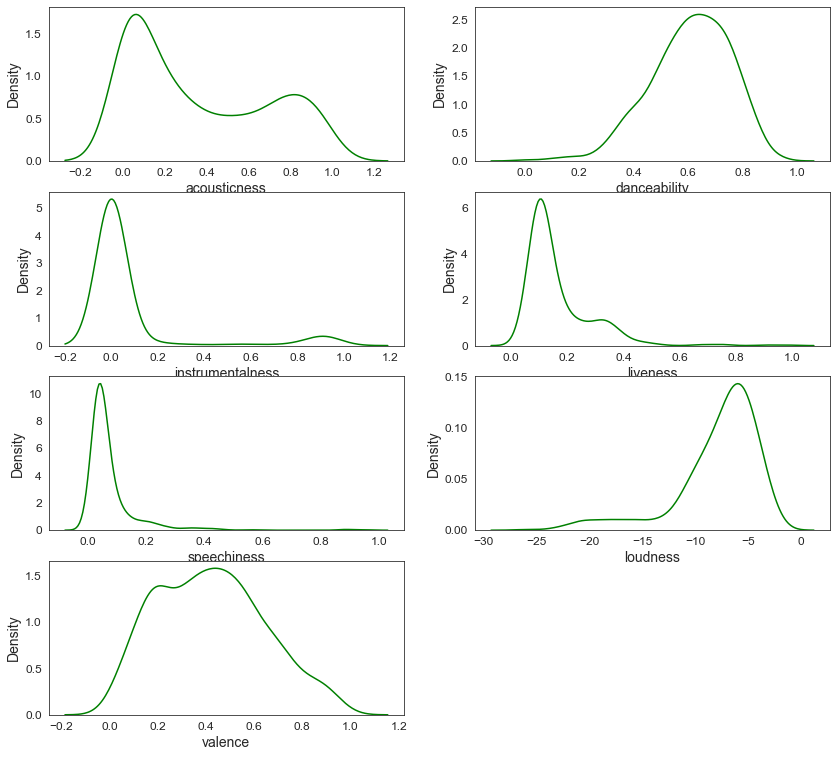

In [125]:
#figure it out
plt.figure(figsize=(14,30))
for i, col in enumerate(df[audio_cols]):
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(df[audio_cols][col], ax=ax, color='green')
plt.show()

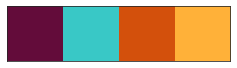

In [126]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import numpy as np
import os
import pandas as pd
# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore")

In [127]:
# to describe numerical features we can use describe()
df[audio_cols].describe()

,acousticness,danceability,instrumentalness,liveness,speechiness,loudness,valence
count,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000
mean,0.359908,0.609470,0.077238,0.164179,0.075384,-7.877194,0.421456
std,0.327557,0.146748,0.236879,0.116255,0.093282,4.041927,0.220586
min,0.000172,0.000000,0.000000,0.026400,0.000000,-25.916000,0.000000
25%,0.054000,0.519000,0.000000,0.093350,0.033750,-9.135500,0.233000
50%,0.244000,0.622000,0.000002,0.120000,0.044200,-6.777000,0.411000
75%,0.684000,0.722500,0.000407,0.193000,0.072500,-5.285500,0.569500
max,0.990000,0.939000,0.990000,0.980000,0.952000,-2.179000,0.970000


In [128]:
songs = df[audio_cols]

In [131]:
cols = ['acousticness', 'danceability', 'instrumentalness', 'liveness',
       'speechiness', 'valence']
for col in songs[cols]:
    songs[col] = np.log(1 + songs[col])

In [132]:
songs

,acousticness,danceability,instrumentalness,liveness,speechiness,loudness,valence
0,0.273076,0.562469,0.000002,0.060907,0.170586,-5.658,0.495915
1,0.103459,0.573800,0.000023,0.125751,0.052782,-4.586,0.586119
2,0.306749,0.625404,0.000001,0.067098,0.036043,-5.030,0.650761
3,0.191446,0.612479,0.000003,0.037585,0.074922,-5.253,0.593879
4,0.176471,0.618424,0.000000,0.066537,0.071390,-3.692,0.528862
...,...,...,...,...,...,...,...
326,0.096219,0.517603,0.000009,0.109751,0.116004,-7.086,0.312619
327,0.637106,0.534737,0.003434,0.227932,0.046979,-6.579,0.357674
328,0.313350,0.575489,0.000000,0.118672,0.032177,-7.775,0.508623
329,0.638163,0.569283,0.000223,0.098034,0.057419,-6.777,0.398105


array([[<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'valence'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

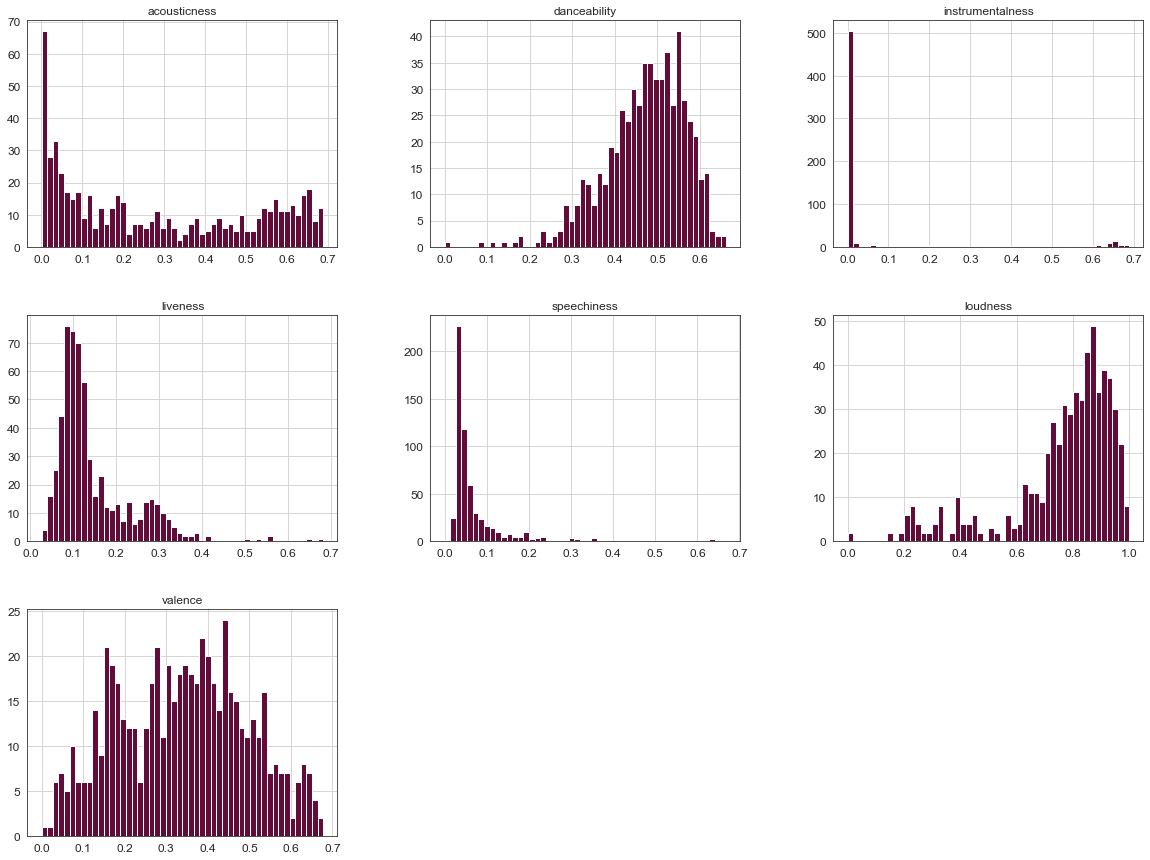

In [133]:
# Loudness feature is from -60db to 0 so we will normalise this column between 0 and 1
# Tempo feature is in BPM so we will scale between 0 and 1 too
from sklearn import preprocessing

loudness = songs[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
songs['loudness'] = pd.DataFrame(loudness_scaled)




songs.hist(bins=50,figsize=(20,15))

In [134]:
# remove song names, artist and id before clustering
songs_features = songs.copy()

In [135]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)

In [136]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (songs_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.34085589398467336)
For n_clusters = 3, silhouette score is 0.35408187742964525)
For n_clusters = 4, silhouette score is 0.3752093925168415)
For n_clusters = 5, silhouette score is 0.2924415489431427)
For n_clusters = 6, silhouette score is 0.25322160304434194)
For n_clusters = 7, silhouette score is 0.2576820727671808)
For n_clusters = 8, silhouette score is 0.2631236267740369)
For n_clusters = 9, silhouette score is 0.21549579820518222)
For n_clusters = 10, silhouette score is 0.2598544768534265)
For n_clusters = 11, silhouette score is 0.23345139184754665)
For n_clusters = 12, silhouette score is 0.2154477186598058)
For n_clusters = 13, silhouette score is 0.1939276446705701)
For n_clusters = 14, silhouette score is 0.22396153269735095)


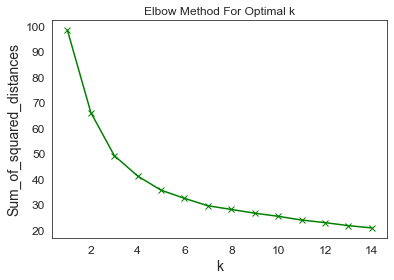

In [137]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [138]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(songs_features)

KMeans(n_clusters=5)

In [139]:
# PCA to reduce our data to 2 dimensions for visualisation
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)

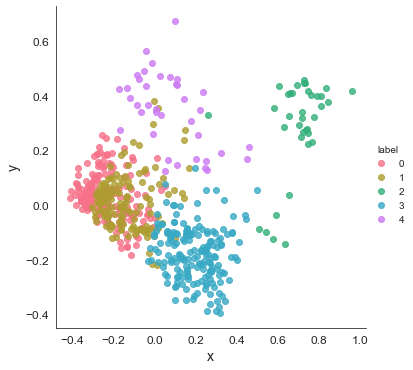

In [140]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)


In [141]:
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(songs_features)

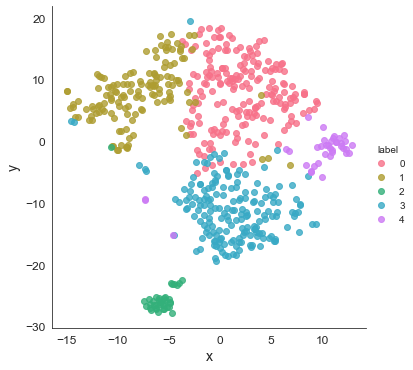

In [142]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [143]:
pca.explained_variance_ratio_

array([0.45669525, 0.2002133 ])

# New Label

In [144]:
songs['label'] = y_kmeans

# shuffle dataset

songs = songs.sample(frac=1)
songs['label'].value_counts()

0    192
3    181
1    139
4     38
2     37
Name: label, dtype: int64

In [145]:
df['label'] = y_kmeans

# shuffle dataset

df = df.sample(frac=1)
df['label'].value_counts()

0    192
3    181
1    139
4     38
2     37
Name: label, dtype: int64

## happy

In [147]:
df[df['label'] == 0].tail(50)[:5]

,Unnamed: 0,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,...,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,type,label
56,10,spotify:track:1ZPpGPko8oULTmi34rozMh,Trivia 轉 : Seesaw,246334,False,11,0.707,0.791,5,-4.481,...,{'isrc': 'QM6MZ1886140'},{'spotify': 'https://open.spotify.com/track/1Z...,https://api.spotify.com/v1/tracks/1ZPpGPko8oUL...,1ZPpGPko8oULTmi34rozMh,False,Trivia 轉 : Seesaw,72,https://p.scdn.co/mp3-preview/f9a86463780a6dd6...,track,0
317,1,spotify:track:5Z3GHaZ6ec9bsiI5BenrbY,Young Dumb & Broke,202546,False,2,0.799,0.539,1,-6.351,...,{'isrc': 'USRC11700144'},{'spotify': 'https://open.spotify.com/track/5Z...,https://api.spotify.com/v1/tracks/5Z3GHaZ6ec9b...,5Z3GHaZ6ec9bsiI5BenrbY,False,Young Dumb & Broke,81,https://p.scdn.co/mp3-preview/34a19481552bf3b9...,track,0
130,4,spotify:track:3Kkjo3cT83cw09VJyrLNwX,Oh My God,225148,False,5,0.534,0.725,1,-3.906,...,{'isrc': 'USSM12105973'},{'spotify': 'https://open.spotify.com/track/3K...,https://api.spotify.com/v1/tracks/3Kkjo3cT83cw...,3Kkjo3cT83cw09VJyrLNwX,False,Oh My God,93,https://p.scdn.co/mp3-preview/c37959aa69d5ff67...,track,0
88,16,spotify:track:6w0NTevf0SB25ZYIInkcCN,Haven,199671,False,17,0.677,0.950,6,-3.535,...,{'isrc': 'US5TA2000112'},{'spotify': 'https://open.spotify.com/track/6w...,https://api.spotify.com/v1/tracks/6w0NTevf0SB2...,6w0NTevf0SB25ZYIInkcCN,False,Haven,49,https://p.scdn.co/mp3-preview/c9f385a8cee6ce98...,track,0
301,14,spotify:track:5eZrW59C3UgBhkqNlowEID,Carry That Weight - Remastered 2009,96466,False,15,0.543,0.458,0,-8.976,...,{'isrc': 'GBAYE0601704'},{'spotify': 'https://open.spotify.com/track/5e...,https://api.spotify.com/v1/tracks/5eZrW59C3UgB...,5eZrW59C3UgBhkqNlowEID,False,Carry That Weight - Remastered 2009,63,NaN,track,0


In [148]:
#seems like happy cluster
songs[songs['label']==0].mean()

acousticness        0.127270
danceability        0.535128
instrumentalness    0.002277
liveness            0.137665
speechiness         0.088511
loudness            0.861611
valence             0.485686
label               0.000000
dtype: float64

## sad

In [149]:
# sad
df[df['label'] == 1]

,Unnamed: 0,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,...,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,type,label
188,9,spotify:track:1AONROylf4jC4qT0Cf7WUe,Forever Yours - Avicii Tribute,193846,False,10,0.530,0.612,10,-8.794,...,{'isrc': 'SEUM71901489'},{'spotify': 'https://open.spotify.com/track/1A...,https://api.spotify.com/v1/tracks/1AONROylf4jC...,1AONROylf4jC4qT0Cf7WUe,False,Forever Yours - Avicii Tribute,12,NaN,track,1
259,9,spotify:track:0MKwF0JfMjCofvrc8lIP5E,Pray,213240,False,10,0.319,0.793,1,-9.197,...,{'isrc': 'GBDVX1200010'},{'spotify': 'https://open.spotify.com/track/0M...,https://api.spotify.com/v1/tracks/0MKwF0JfMjCo...,0MKwF0JfMjCofvrc8lIP5E,False,Pray,42,https://p.scdn.co/mp3-preview/ed44dce4d4cf12aa...,track,1
293,6,spotify:track:6dGnYIeXmHdcikdzNNDMm2,Here Comes The Sun - Remastered 2009,185733,False,7,0.557,0.540,9,-10.484,...,{'isrc': 'GBAYE0601696'},{'spotify': 'https://open.spotify.com/track/6d...,https://api.spotify.com/v1/tracks/6dGnYIeXmHdc...,6dGnYIeXmHdcikdzNNDMm2,False,Here Comes The Sun - Remastered 2009,82,NaN,track,1
62,16,spotify:track:2tMBCYj22KxtmkAACIvvk4,Magic Shop,275695,False,1,0.541,0.661,1,-5.838,...,{'isrc': 'QM6MZ1886146'},{'spotify': 'https://open.spotify.com/track/2t...,https://api.spotify.com/v1/tracks/2tMBCYj22Kxt...,2tMBCYj22KxtmkAACIvvk4,False,Magic Shop,72,https://p.scdn.co/mp3-preview/eec98a019af34887...,track,1
75,12,spotify:track:65OEcDb4M3mAvEpSdXi6Lv,obvious,146958,True,13,0.624,0.672,0,-5.334,...,{'isrc': 'USUM72020439'},{'spotify': 'https://open.spotify.com/track/65...,https://api.spotify.com/v1/tracks/65OEcDb4M3mA...,65OEcDb4M3mAvEpSdXi6Lv,False,obvious,57,NaN,track,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,0,spotify:track:45S5WTQEGOB1VHr1Q4FuPl,Golden,208906,False,1,0.448,0.838,4,-5.257,...,{'isrc': 'USSM11912586'},{'spotify': 'https://open.spotify.com/track/45...,https://api.spotify.com/v1/tracks/45S5WTQEGOB1...,45S5WTQEGOB1VHr1Q4FuPl,False,Golden,85,https://p.scdn.co/mp3-preview/b8bbc5ca9cc5fc1a...,track,1
2,2,spotify:track:3S7HNKPakdwNEBFIVTL6dZ,Treacherous (Taylor's Version),242720,False,3,0.645,0.593,2,-6.506,...,{'isrc': 'USUG12103663'},{'spotify': 'https://open.spotify.com/track/3S...,https://api.spotify.com/v1/tracks/3S7HNKPakdwN...,3S7HNKPakdwNEBFIVTL6dZ,False,Treacherous (Taylor's Version),83,NaN,track,1
105,1,spotify:track:2wCzMIdJs8rmZaN8agMrz8,Walk The Talk,203888,False,2,0.568,0.817,1,-6.560,...,{'isrc': 'FR59R1805070'},{'spotify': 'https://open.spotify.com/track/2w...,https://api.spotify.com/v1/tracks/2wCzMIdJs8rm...,2wCzMIdJs8rmZaN8agMrz8,False,Walk The Talk,45,https://p.scdn.co/mp3-preview/95d3bbdba357972a...,track,1
152,0,spotify:track:6bvZRLLkBKkmgpBJTTj3QK,How You Like That,180956,False,1,0.813,0.787,11,-4.254,...,{'isrc': 'KRA402000111'},{'spotify': 'https://open.spotify.com/track/6b...,https://api.spotify.com/v1/tracks/6bvZRLLkBKkm...,6bvZRLLkBKkmgpBJTTj3QK,False,How You Like That,76,https://p.scdn.co/mp3-preview/80d970005871e286...,track,1


In [150]:
# seems like sad 
songs[songs['label']==1].mean()

acousticness        0.094021
danceability        0.433416
instrumentalness    0.049778
liveness            0.157942
speechiness         0.049050
loudness            0.837353
valence             0.247405
label               1.000000
dtype: float64

## Love

In [151]:
df[df['label'] == 2]

,Unnamed: 0,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,...,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,type,label
216,10,spotify:track:45VoAg71ffqji03MNsMjw6,Jazz Cafe LoFi,138703,False,11,0.7520,0.2200,6,-16.012,...,{'isrc': 'GBENT1681763'},{'spotify': 'https://open.spotify.com/track/45...,https://api.spotify.com/v1/tracks/45VoAg71ffqj...,45VoAg71ffqji03MNsMjw6,False,Jazz Cafe LoFi,16,https://p.scdn.co/mp3-preview/139b2bc0ac31aea7...,track,2
215,9,spotify:track:3A5wAJUGSRl5K55I3zQ43X,Atmospheric Rain Beat,186874,False,10,0.5320,0.2840,0,-16.429,...,{'isrc': 'GBENT1682083'},{'spotify': 'https://open.spotify.com/track/3A...,https://api.spotify.com/v1/tracks/3A5wAJUGSRl5...,3A5wAJUGSRl5K55I3zQ43X,False,Atmospheric Rain Beat,16,https://p.scdn.co/mp3-preview/937c8720cbaf3781...,track,2
94,5,spotify:track:3gktHyhUYSZmJAewFjxcoX,Red Nexus Rising - Interlude,39997,False,6,0.3890,0.6290,9,-10.449,...,{'isrc': 'NOG842120010'},{'spotify': 'https://open.spotify.com/track/3g...,https://api.spotify.com/v1/tracks/3gktHyhUYSZm...,3gktHyhUYSZmJAewFjxcoX,False,Red Nexus Rising - Interlude,58,https://p.scdn.co/mp3-preview/62a3eac3f05736ab...,track,2
284,7,spotify:track:4Ozmbn4LIW5WVZhhHuk1Gp,Rain Man,44120,False,8,0.3890,0.2920,5,-9.636,...,{'isrc': 'US23A1500502'},{'spotify': 'https://open.spotify.com/track/4O...,https://api.spotify.com/v1/tracks/4Ozmbn4LIW5W...,4Ozmbn4LIW5WVZhhHuk1Gp,False,Rain Man,50,https://p.scdn.co/mp3-preview/ae44a59697cacd13...,track,2
226,20,spotify:track:5e6HudOamWwALdvpDsZDDI,LoFi Jazz To Sleep,144036,False,21,0.7230,0.1970,1,-18.187,...,{'isrc': 'GBENT1681767'},{'spotify': 'https://open.spotify.com/track/5e...,https://api.spotify.com/v1/tracks/5e6HudOamWwA...,5e6HudOamWwALdvpDsZDDI,False,LoFi Jazz To Sleep,13,https://p.scdn.co/mp3-preview/20cf44d95db44d6a...,track,2
230,24,spotify:track:1HZoy0HDyz3AIejxwBBfLW,Study Beat,139136,False,25,0.7170,0.2010,1,-20.060,...,{'isrc': 'GBENT1682079'},{'spotify': 'https://open.spotify.com/track/1H...,https://api.spotify.com/v1/tracks/1HZoy0HDyz3A...,1HZoy0HDyz3AIejxwBBfLW,False,Study Beat,14,https://p.scdn.co/mp3-preview/31246eadd2d1eb31...,track,2
221,15,spotify:track:3GIXnhBDh8eQ4EVsNm9UxV,Sex Music Chill,154400,False,16,0.6610,0.1650,8,-18.712,...,{'isrc': 'GBENT1682075'},{'spotify': 'https://open.spotify.com/track/3G...,https://api.spotify.com/v1/tracks/3GIXnhBDh8eQ...,3GIXnhBDh8eQ4EVsNm9UxV,False,Sex Music Chill,14,https://p.scdn.co/mp3-preview/b439307a6eb5b5ea...,track,2
222,16,spotify:track:2Fdoh1MtjG1UFfssV0OVy1,Music To Study,165980,False,17,0.6020,0.2440,0,-22.299,...,{'isrc': 'GBENT1681930'},{'spotify': 'https://open.spotify.com/track/2F...,https://api.spotify.com/v1/tracks/2Fdoh1MtjG1U...,2Fdoh1MtjG1UFfssV0OVy1,False,Music To Study,14,https://p.scdn.co/mp3-preview/2c76178a78acf8a5...,track,2
225,19,spotify:track:2moJgkgzxxuDWXPL8P3s3y,Vaporwave LoFi Chill,121363,False,20,0.7390,0.0593,9,-20.095,...,{'isrc': 'GBENT1682076'},{'spotify': 'https://open.spotify.com/track/2m...,https://api.spotify.com/v1/tracks/2moJgkgzxxuD...,2moJgkgzxxuDWXPL8P3s3y,False,Vaporwave LoFi Chill,13,https://p.scdn.co/mp3-preview/3a0409823b1a6484...,track,2
223,17,spotify:track:55XKX37QTlDQusnCAkwGWq,Ambient LoFi,187004,False,18,0.1760,0.0427,10,-25.916,...,{'isrc': 'GBENT1682081'},{'spotify': 'https://open.spotify.com/track/55...,https://api.spotify.com/v1/tracks/55XKX37QTlDQ...,55XKX37QTlDQusnCAkwGWq,False,Ambient LoFi,14,https://p.scdn.co/mp3-preview/55b35d21dd27f4af...,track,2


In [152]:
songs[songs['label']==2].mean()

acousticness        0.615740
danceability        0.431431
instrumentalness    0.639972
liveness            0.151287
speechiness         0.074902
loudness            0.387956
valence             0.167950
label               2.000000
dtype: float64

## Fear

In [153]:
# angry
df[df['label'] == 3].head(50)

,Unnamed: 0,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,...,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,type,label
11,11,spotify:track:73qMN9bXy7MSPwwGfH3wQr,Sad Beautiful Tragic (Taylor's Version),284773,False,12,0.601,0.4060,7,-11.827,...,{'isrc': 'USUG12103672'},{'spotify': 'https://open.spotify.com/track/73...,https://api.spotify.com/v1/tracks/73qMN9bXy7MS...,73qMN9bXy7MSPwwGfH3wQr,False,Sad Beautiful Tragic (Taylor's Version),80,NaN,track,3
278,1,spotify:track:5OUTFH5acycdnf8OVo21Gv,Television / So Far So Good,262600,True,2,0.405,0.5050,5,-7.750,...,{'isrc': 'US23A1500497'},{'spotify': 'https://open.spotify.com/track/5O...,https://api.spotify.com/v1/tracks/5OUTFH5acycd...,5OUTFH5acycdnf8OVo21Gv,False,Television / So Far So Good,82,https://p.scdn.co/mp3-preview/94d16245edc30f5f...,track,3
124,4,spotify:track:6HU7h9RYOaPRFeh0R3UeAr,deja vu,215506,True,5,0.442,0.6120,2,-7.222,...,{'isrc': 'USUG12101240'},{'spotify': 'https://open.spotify.com/track/6H...,https://api.spotify.com/v1/tracks/6HU7h9RYOaPR...,6HU7h9RYOaPRFeh0R3UeAr,False,deja vu,89,NaN,track,3
294,7,spotify:track:1rxoyGj1QuPoVi8fOft1Kt,Because - Remastered 2009,165666,False,8,0.328,0.2490,2,-11.777,...,{'isrc': 'GBAYE0601697'},{'spotify': 'https://open.spotify.com/track/1r...,https://api.spotify.com/v1/tracks/1rxoyGj1QuPo...,1rxoyGj1QuPoVi8fOft1Kt,False,Because - Remastered 2009,60,NaN,track,3
199,4,spotify:track:7mjO4RbTZIb1SfE8G673Lm,Rehat,354480,False,5,0.326,0.2520,2,-12.514,...,{'isrc': 'IDA681800075'},{'spotify': 'https://open.spotify.com/track/7m...,https://api.spotify.com/v1/tracks/7mjO4RbTZIb1...,7mjO4RbTZIb1SfE8G673Lm,False,Rehat,64,NaN,track,3
27,27,spotify:track:4IQkfUsrwXol38VV3U7t7T,Run (feat. Ed Sheeran) (Taylor’s Version) (Fro...,240226,False,28,0.610,0.4880,3,-6.918,...,{'isrc': 'USUG12103688'},{'spotify': 'https://open.spotify.com/track/4I...,https://api.spotify.com/v1/tracks/4IQkfUsrwXol...,4IQkfUsrwXol38VV3U7t7T,False,Run (feat. Ed Sheeran) (Taylor’s Version) (Fro...,85,NaN,track,3
121,1,spotify:track:5CZ40GBx1sQ9agT82CLQCT,traitor,229226,False,2,0.380,0.3390,3,-7.885,...,{'isrc': 'USUG12101243'},{'spotify': 'https://open.spotify.com/track/5C...,https://api.spotify.com/v1/tracks/5CZ40GBx1sQ9...,5CZ40GBx1sQ9agT82CLQCT,False,traitor,92,NaN,track,3
93,3,spotify:track:3XF5xLJHOQQRbWya6hBp7d,you should see me in a crown,180952,False,4,0.678,0.5330,4,-10.485,...,{'isrc': 'USUM71810049'},{'spotify': 'https://open.spotify.com/track/3X...,https://api.spotify.com/v1/tracks/3XF5xLJHOQQR...,3XF5xLJHOQQRbWya6hBp7d,False,you should see me in a crown,77,NaN,track,3
122,9,spotify:track:1OEKNjrCnModm8cHJ7hRXc,In the Stars (feat. Kiiara),203706,False,10,0.638,0.7960,0,-4.078,...,{'isrc': 'USAT21812309'},{'spotify': 'https://open.spotify.com/track/1O...,https://api.spotify.com/v1/tracks/1OEKNjrCnMod...,1OEKNjrCnModm8cHJ7hRXc,False,In the Stars (feat. Kiiara),44,https://p.scdn.co/mp3-preview/871475e1d313acd4...,track,3
204,0,spotify:track:26dXOkhzMxLLNaUXt77HQc,always,172354,False,1,0.629,0.4950,9,-6.860,...,{'isrc': 'USUM72012981'},{'spotify': 'https://open.spotify.com/track/26...,https://api.spotify.com/v1/tracks/26dXOkhzMxLL...,26dXOkhzMxLLNaUXt77HQc,False,always,68,NaN,track,3


In [154]:
songs[songs['label']==3].mean()

acousticness        0.533103
danceability        0.432914
instrumentalness    0.013367
liveness            0.147827
speechiness         0.057372
loudness            0.771740
valence             0.273994
label               3.000000
dtype: float64

## Angry

In [155]:
#angry
df[df['label'] == 4]

,Unnamed: 0,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,...,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,type,label
216,6,spotify:track:7ypFllJwlotXBJfLjsXhvo,Dear Sputnik,194912,False,7,0.529,0.806,0,-3.800,...,{'isrc': 'USA2P2108447'},{'spotify': 'https://open.spotify.com/track/7y...,https://api.spotify.com/v1/tracks/7ypFllJwlotX...,7ypFllJwlotXBJfLjsXhvo,False,Dear Sputnik,63,https://p.scdn.co/mp3-preview/d7b1ec77802f460a...,track,4
214,4,spotify:track:6pU4nUCle2kZR2k3XV86YF,What if I had been that PUMA,212703,False,5,0.861,0.679,0,-5.608,...,{'isrc': 'USA2P2108445'},{'spotify': 'https://open.spotify.com/track/6p...,https://api.spotify.com/v1/tracks/6pU4nUCle2kZ...,6pU4nUCle2kZR2k3XV86YF,False,What if I had been that PUMA,60,https://p.scdn.co/mp3-preview/55f0b42cbb8a824c...,track,4
228,2,spotify:track:54WpJSyO81dpA40MKJHd0C,Echo (feat. blackbear),178620,False,3,0.759,0.670,1,-5.309,...,{'isrc': 'USUM72106313'},{'spotify': 'https://open.spotify.com/track/54...,https://api.spotify.com/v1/tracks/54WpJSyO81dp...,54WpJSyO81dpA40MKJHd0C,False,Echo (feat. blackbear),64,NaN,track,4
153,1,spotify:track:1cdbkpZ3q1KYZDNSrOpdkb,Ice Cream (with Selena Gomez),175813,False,2,0.791,0.733,9,-3.852,...,{'isrc': 'KRA402000131'},{'spotify': 'https://open.spotify.com/track/1c...,https://api.spotify.com/v1/tracks/1cdbkpZ3q1KY...,1cdbkpZ3q1KYZDNSrOpdkb,False,Ice Cream (with Selena Gomez),72,https://p.scdn.co/mp3-preview/cd85ec461cec71be...,track,4
250,0,spotify:track:0KMCr7N42xmCZBW0re2m7y,One Day,255560,False,1,0.478,0.749,3,-5.554,...,{'isrc': 'GBDVX1200012'},{'spotify': 'https://open.spotify.com/track/0K...,https://api.spotify.com/v1/tracks/0KMCr7N42xmC...,0KMCr7N42xmCZBW0re2m7y,False,One Day,54,https://p.scdn.co/mp3-preview/16254179ed1b2bf3...,track,4
211,1,spotify:track:1Z8TPHiKeCUyClxV6WTTIf,0X1=LOVESONG (I Know I Love You) feat. Seori,202203,False,2,0.584,0.836,0,-4.925,...,{'isrc': 'USA2P2108442'},{'spotify': 'https://open.spotify.com/track/1Z...,https://api.spotify.com/v1/tracks/1Z8TPHiKeCUy...,1Z8TPHiKeCUyClxV6WTTIf,False,0X1=LOVESONG (I Know I Love You) feat. Seori,79,https://p.scdn.co/mp3-preview/341b5a6418425ce7...,track,4
165,13,spotify:track:6tBOuzucH3PGwEA3yWzwRG,Wejangan Caca,86500,False,14,0.622,0.511,5,-18.134,...,{'isrc': 'FR96X1970884'},{'spotify': 'https://open.spotify.com/track/6t...,https://api.spotify.com/v1/tracks/6tBOuzucH3PG...,6tBOuzucH3PGwEA3yWzwRG,False,Wejangan Caca,37,https://p.scdn.co/mp3-preview/b275ecdd4dd7a673...,track,4
234,8,spotify:track:2ST72jD2KVe7f3fbcGyX1b,Nobody's Love,211253,False,9,0.485,0.567,1,-6.456,...,{'isrc': 'USUM72013111'},{'spotify': 'https://open.spotify.com/track/2S...,https://api.spotify.com/v1/tracks/2ST72jD2KVe7...,2ST72jD2KVe7f3fbcGyX1b,False,Nobody's Love,72,NaN,track,4
232,6,spotify:track:6PyFYTEo8X3inQ4hQvA8md,One Light (feat. Bantu),214390,False,7,0.810,0.642,10,-5.801,...,{'isrc': 'USUM72106318'},{'spotify': 'https://open.spotify.com/track/6P...,https://api.spotify.com/v1/tracks/6PyFYTEo8X3i...,6PyFYTEo8X3inQ4hQvA8md,False,One Light (feat. Bantu),60,NaN,track,4
32,2,spotify:track:51ChrwmUPDJvedPQnIU8Ls,Dive,238440,False,3,0.761,0.386,4,-6.158,...,{'isrc': 'GBAHS1700022'},{'spotify': 'https://open.spotify.com/track/51...,https://api.spotify.com/v1/tracks/51ChrwmUPDJv...,51ChrwmUPDJvedPQnIU8Ls,False,Dive,76,https://p.scdn.co/mp3-preview/14bdcdfb15edba50...,track,4


In [156]:
songs[songs['label']==4].mean()

acousticness        0.192878
danceability        0.512748
instrumentalness    0.002687
liveness            0.155848
speechiness         0.103277
loudness            0.338268
valence             0.419748
label               4.000000
dtype: float64

### Analysis

In [74]:
classify = {
    4 : 'Anger',
    3 : 'Fear',
    2 : 'Love',
    1 : 'Sad',
    0 : 'Happy'
}

df['label'] = df['label'].replace(classify)

In [76]:
classify = {
    'Anger' : 0,
    'Fear' :3,
    'Love' : 4,
    'Sad' : 2,
    'Happy' : 1
}

df['label_encode'] = df['label'].replace(classify)

In [79]:
df['label']

91     Happy
9      Anger
259    Anger
11       Sad
14     Anger
       ...  
325      Sad
10     Anger
288    Anger
16     Happy
98     Happy
Name: label, Length: 587, dtype: object

In [80]:
df

,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,...,href,id,is_local,name,popularity,preview_url,type,Unnamed: 0,label,label_encode
91,spotify:track:2Fxmhks0bxGSBdJ92vM42m,bad guy,194087,False,2,0.701,0.425,7,-10.965,0.3750,...,https://api.spotify.com/v1/tracks/2Fxmhks0bxGS...,2Fxmhks0bxGSBdJ92vM42m,False,bad guy,86,NaN,track,1.0,Happy,1
9,spotify:track:1AONROylf4jC4qT0Cf7WUe,Forever Yours - Avicii Tribute,193846,False,10,0.530,0.612,10,-8.794,0.0518,...,https://api.spotify.com/v1/tracks/1AONROylf4jC...,1AONROylf4jC4qT0Cf7WUe,False,Forever Yours - Avicii Tribute,12,None,track,NaN,Anger,0
259,spotify:track:0MKwF0JfMjCofvrc8lIP5E,Pray,213240,False,10,0.319,0.793,1,-9.197,0.0464,...,https://api.spotify.com/v1/tracks/0MKwF0JfMjCo...,0MKwF0JfMjCofvrc8lIP5E,False,Pray,42,https://p.scdn.co/mp3-preview/ed44dce4d4cf12aa...,track,9.0,Anger,0
11,spotify:track:73qMN9bXy7MSPwwGfH3wQr,Sad Beautiful Tragic (Taylor's Version),284773,False,12,0.601,0.406,7,-11.827,0.0275,...,https://api.spotify.com/v1/tracks/73qMN9bXy7MS...,73qMN9bXy7MSPwwGfH3wQr,False,Sad Beautiful Tragic (Taylor's Version),80,NaN,track,11.0,Sad,2
14,spotify:track:2AIWoHr9DF6y4KALCBKWQS,IDOL,222732,False,15,0.734,0.855,9,-3.211,0.1180,...,https://api.spotify.com/v1/tracks/2AIWoHr9DF6y...,2AIWoHr9DF6y4KALCBKWQS,False,IDOL,77,https://p.scdn.co/mp3-preview/fc013a8d8851b4b8...,track,NaN,Anger,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,spotify:track:34izzOmykADkGT27pUjUvJ,Cold Blooded,207960,False,10,0.710,0.405,9,-10.864,0.0519,...,https://api.spotify.com/v1/tracks/34izzOmykADk...,34izzOmykADkGT27pUjUvJ,False,Cold Blooded,59,https://p.scdn.co/mp3-preview/c8e09b22ad6401a3...,track,9.0,Sad,2
10,spotify:track:1PuQTv1Kr1gzLgVeATSuh6,Somebody Told Me,216053,False,11,0.592,0.839,1,-4.944,0.0564,...,https://api.spotify.com/v1/tracks/1PuQTv1Kr1gz...,1PuQTv1Kr1gzLgVeATSuh6,False,Somebody Told Me,55,https://p.scdn.co/mp3-preview/fc227b3c5c71567b...,track,NaN,Anger,0
288,spotify:track:0pNeVovbiZHkulpGeOx1Gj,Something - Remastered 2009,182293,False,2,0.396,0.338,0,-10.872,0.0304,...,https://api.spotify.com/v1/tracks/0pNeVovbiZHk...,0pNeVovbiZHkulpGeOx1Gj,False,Something - Remastered 2009,72,NaN,track,1.0,Anger,0
16,spotify:track:4iwIOXQXHLlhjOCyJbbUlo,No Therapy,172909,False,17,0.774,0.605,8,-6.103,0.1380,...,https://api.spotify.com/v1/tracks/4iwIOXQXHLlh...,4iwIOXQXHLlhjOCyJbbUlo,False,No Therapy,10,None,track,NaN,Happy,1


# Model Classification

In [82]:
df.head()

,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,...,href,id,is_local,name,popularity,preview_url,type,Unnamed: 0,label,label_encode
91,spotify:track:2Fxmhks0bxGSBdJ92vM42m,bad guy,194087,False,2,0.701,0.425,7,-10.965,0.3750,...,https://api.spotify.com/v1/tracks/2Fxmhks0bxGS...,2Fxmhks0bxGSBdJ92vM42m,False,bad guy,86,NaN,track,1.0,Happy,1
9,spotify:track:1AONROylf4jC4qT0Cf7WUe,Forever Yours - Avicii Tribute,193846,False,10,0.530,0.612,10,-8.794,0.0518,...,https://api.spotify.com/v1/tracks/1AONROylf4jC...,1AONROylf4jC4qT0Cf7WUe,False,Forever Yours - Avicii Tribute,12,None,track,NaN,Anger,0
259,spotify:track:0MKwF0JfMjCofvrc8lIP5E,Pray,213240,False,10,0.319,0.793,1,-9.197,0.0464,...,https://api.spotify.com/v1/tracks/0MKwF0JfMjCo...,0MKwF0JfMjCofvrc8lIP5E,False,Pray,42,https://p.scdn.co/mp3-preview/ed44dce4d4cf12aa...,track,9.0,Anger,0
11,spotify:track:73qMN9bXy7MSPwwGfH3wQr,Sad Beautiful Tragic (Taylor's Version),284773,False,12,0.601,0.406,7,-11.827,0.0275,...,https://api.spotify.com/v1/tracks/73qMN9bXy7MS...,73qMN9bXy7MSPwwGfH3wQr,False,Sad Beautiful Tragic (Taylor's Version),80,NaN,track,11.0,Sad,2
14,spotify:track:2AIWoHr9DF6y4KALCBKWQS,IDOL,222732,False,15,0.734,0.855,9,-3.211,0.1180,...,https://api.spotify.com/v1/tracks/2AIWoHr9DF6y...,2AIWoHr9DF6y4KALCBKWQS,False,IDOL,77,https://p.scdn.co/mp3-preview/fc013a8d8851b4b8...,track,NaN,Anger,0


In [85]:
data = df[['track', 'popularity', 'acousticness', 'danceability', 'instrumentalness', 'liveness', 'speechiness', 'loudness', 'valence', 'label_encode', 'label']]

In [86]:
data

,track,popularity,acousticness,danceability,instrumentalness,liveness,speechiness,loudness,valence,label_encode,label
91,bad guy,86,0.32800,0.701,0.130000,0.1000,0.3750,-10.965,0.562,1,Happy
9,Forever Yours - Avicii Tribute,12,0.25300,0.530,0.000000,0.2460,0.0518,-8.794,0.433,0,Anger
259,Pray,42,0.37000,0.319,0.097100,0.0947,0.0464,-9.197,0.156,0,Anger
11,Sad Beautiful Tragic (Taylor's Version),80,0.62200,0.601,0.000092,0.1330,0.0275,-11.827,0.232,2,Sad
14,IDOL,77,0.00481,0.734,0.000000,0.1230,0.1180,-3.211,0.422,0,Anger
...,...,...,...,...,...,...,...,...,...,...,...
325,Cold Blooded,59,0.77700,0.710,0.000163,0.1110,0.0519,-10.864,0.402,2,Sad
10,Somebody Told Me,55,0.10100,0.592,0.000000,0.0528,0.0564,-4.944,0.457,0,Anger
288,Something - Remastered 2009,72,0.19800,0.396,0.000003,0.1380,0.0304,-10.872,0.377,0,Anger
16,No Therapy,10,0.26400,0.774,0.000000,0.3550,0.1380,-6.103,0.584,1,Happy


In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

X = songs_features
y = y_kmeans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [88]:
# Predicting the Test set results
y_pred = rfc.predict(X_test)

In [89]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[52  0  0  0  6]
 [ 0 51  0  0  0]
 [ 0  0 14  0  1]
 [ 1  1  0  8  0]
 [ 0  1  1  0 58]]


<AxesSubplot:title={'center':'Confusion matrix for Random Forest'}, xlabel='Predicted label', ylabel='True label'>

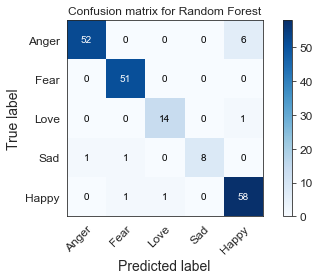

In [90]:
# Confusion matrix
definitions = ['Anger','Fear','Love','Sad', 'Happy']

# reversefactor = dict(zip(range(4),definitions))
# actual = np.vectorize(reversefactor.get)(y_test)
# pred = np.vectorize(reversefactor.get)(y_pred)
# print(pd.crosstab(actual, pred, rownames=['Actual Mood'], colnames=['Predicted Mood']))

plot_confusion_matrix(y_test, y_pred, classes=definitions,
                      title='Confusion matrix for Random Forest')

In [91]:
# View a list of the features and their importance scores
features = songs_features.columns
list(zip(songs_features[features], rfc.feature_importances_))

[('acousticness', 0.3573992217138695),
 ('danceability', 0.09077212517569973),
 ('instrumentalness', 0.1265852549493856),
 ('liveness', 0.030285660373436833),
 ('speechiness', 0.040208455991100296),
 ('loudness', 0.11537835566230231),
 ('valence', 0.23937092613420563)]

In [95]:
print(classification_report(y_test,y_pred,target_names=definitions)+'forest')

              precision    recall  f1-score   support

       Anger       0.98      0.90      0.94        58
        Fear       0.96      1.00      0.98        51
        Love       0.93      0.93      0.93        15
         Sad       1.00      0.80      0.89        10
       Happy       0.89      0.97      0.93        60

    accuracy                           0.94       194
   macro avg       0.95      0.92      0.93       194
weighted avg       0.95      0.94      0.94       194
forest


In [92]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
# Train the model using the training sets
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [93]:
knn_pred =knn.predict(X_test)

Confusion matrix, without normalization
[[56  0  0  1  1]
 [ 0 46  0  0  5]
 [ 0  0 14  0  1]
 [ 1  0  0  9  0]
 [ 0  0  1  0 59]]


<AxesSubplot:title={'center':'Confusion matrix for KNN'}, xlabel='Predicted label', ylabel='True label'>

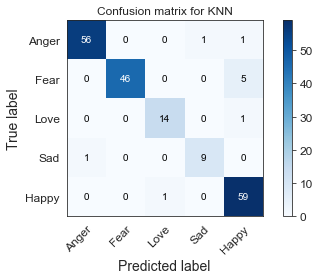

In [94]:
plot_confusion_matrix(y_test, knn_pred, classes=definitions,
                      title='Confusion matrix for KNN')

In [96]:
print(classification_report(y_test,knn_pred,target_names=definitions)+'KNN')

              precision    recall  f1-score   support

       Anger       0.98      0.97      0.97        58
        Fear       1.00      0.90      0.95        51
        Love       0.93      0.93      0.93        15
         Sad       0.90      0.90      0.90        10
       Happy       0.89      0.98      0.94        60

    accuracy                           0.95       194
   macro avg       0.94      0.94      0.94       194
weighted avg       0.95      0.95      0.95       194
KNN


In [97]:
from sklearn.neural_network import MLPClassifier

In [98]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

MLPClassifier()

In [99]:
mlp_pred = mlp.predict(X_test)

Confusion matrix, without normalization
[[56  0  0  0  2]
 [ 0 48  0  0  3]
 [ 0  0 15  0  0]
 [ 2  1  0  6  1]
 [ 1  1  0  0 58]]


<AxesSubplot:title={'center':'Confusion matrix for MLP'}, xlabel='Predicted label', ylabel='True label'>

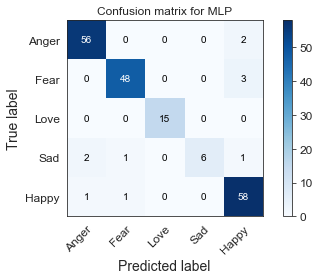

In [100]:
plot_confusion_matrix(y_test, mlp_pred, classes=definitions,
                      title='Confusion matrix for MLP')

In [101]:
print(classification_report(y_test,mlp_pred,target_names=definitions)+'MLP')

              precision    recall  f1-score   support

       Anger       0.95      0.97      0.96        58
        Fear       0.96      0.94      0.95        51
        Love       1.00      1.00      1.00        15
         Sad       1.00      0.60      0.75        10
       Happy       0.91      0.97      0.94        60

    accuracy                           0.94       194
   macro avg       0.96      0.89      0.92       194
weighted avg       0.95      0.94      0.94       194
MLP
